In [ ]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

In [ ]:
df = pd.read_csv('/content/BankChurners.csv.zip')

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
df.Marital_Status.head(50)

0      Married
1       Single
2      Married
3      Unknown
4      Married
5      Married
6      Married
7      Unknown
8       Single
9       Single
10     Unknown
11     Married
12      Single
13     Unknown
14     Married
15     Unknown
16      Single
17     Married
18     Married
19     Married
20    Divorced
21     Married
22     Married
23      Single
24     Married
25      Single
26     Unknown
27     Married
28      Single
29     Married
30     Married
31     Married
32     Married
33     Married
34     Married
35      Single
36     Married
37     Married
38     Unknown
39     Married
40      Single
41     Married
42      Single
43     Married
44      Single
45      Single
46     Married
47     Married
48     Married
49      Single
Name: Marital_Status, dtype: object

In [ ]:
df.Gender


0        M
1        F
2        M
3        F
4        M
        ..
10122    M
10123    M
10124    F
10125    M
10126    F
Name: Gender, Length: 10127, dtype: object

In [ ]:
df.columns


Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [ ]:
df.shape

(10127, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [ ]:
df_duplicated = df[df.duplicated()]
df_duplicated.shape[0]

0

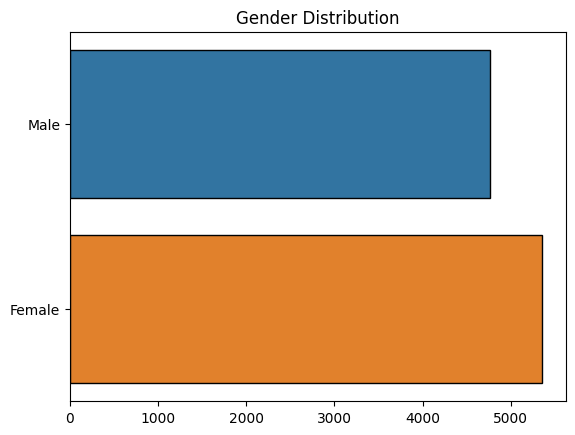

In [ ]:
sns.countplot(data = df, y = 'Gender',  edgecolor='black')
plt.xlabel('')
plt.ylabel('')
plt.title('Gender Distribution')
plt.gca().set_yticklabels(['Male', 'Female'])
plt.show()

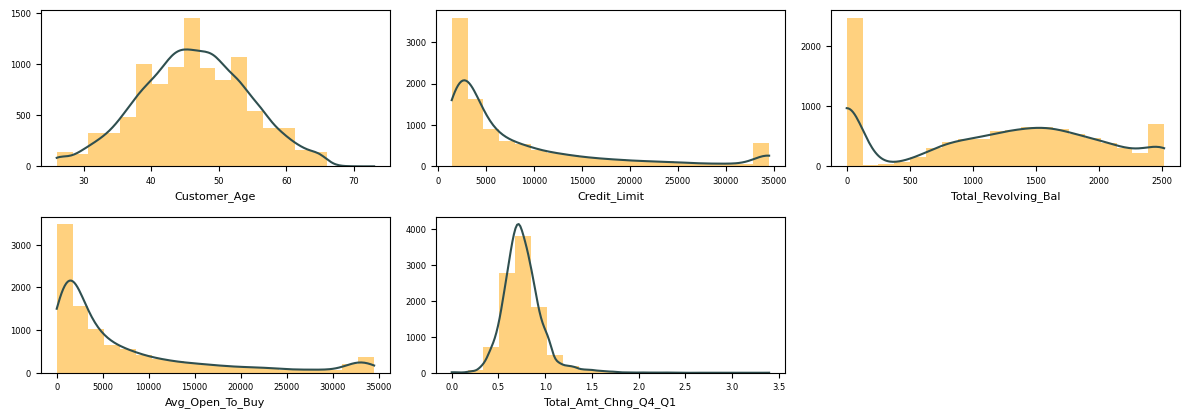

In [ ]:
numeric_columns = ['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1']
plt.figure(figsize=(12, 6))
for i, var in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    ax = sns.histplot(data=df, x=var, bins=20, kde=True, color='orange', alpha=0.5, linewidth=0)
    ax.lines[0].set_color('darkslategrey')
    plt.ylabel('')
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.xlabel(var, fontsize=8)
plt.tight_layout()
plt.show()

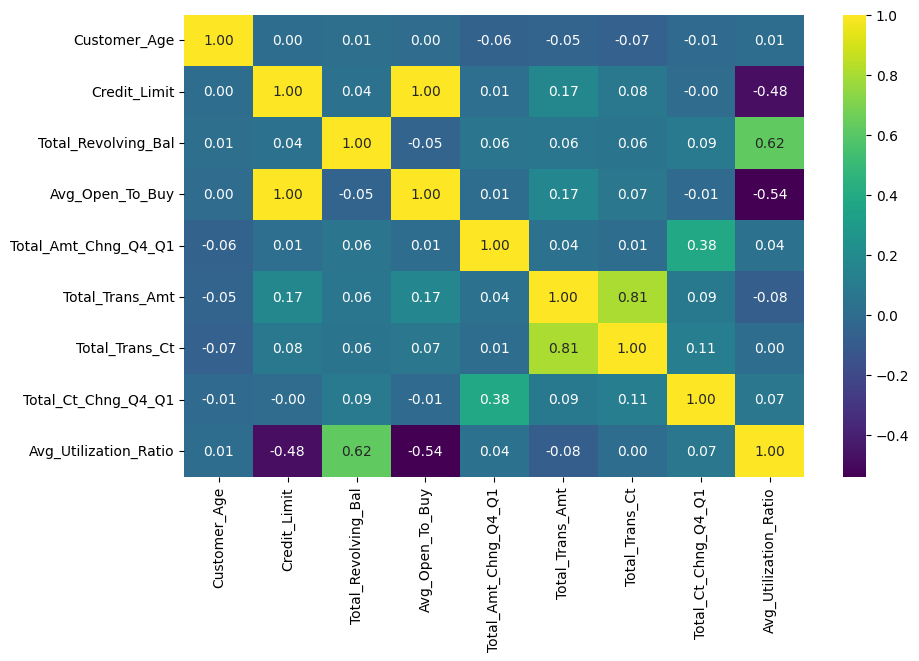

In [ ]:
corr_matrix = df.loc[:, ['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, annot_kws={'size':10}, fmt='.2f', cmap='viridis')
plt.show()

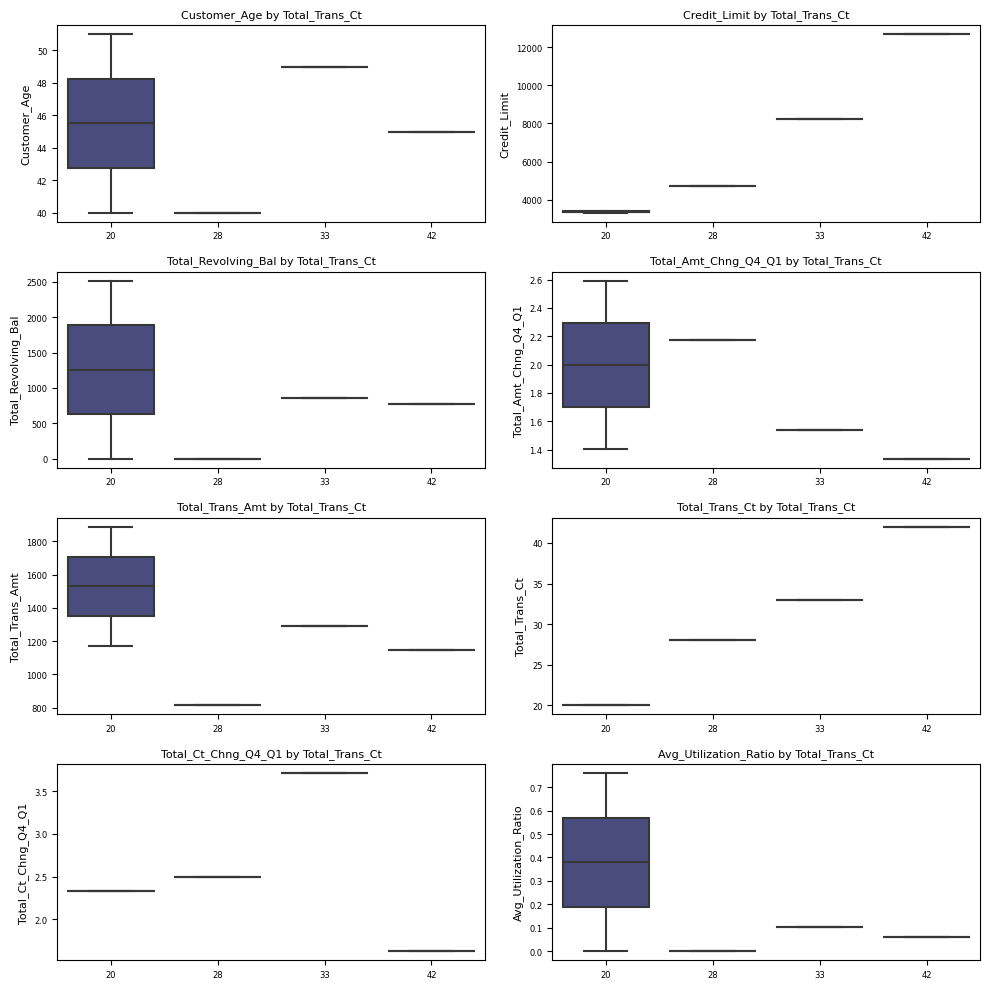

In [ ]:
columns = ['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal',
           'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt', 'Total_Trans_Ct',
           'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

fig, ax = plt.subplots(4, 2, figsize=(10, 10))
ax = ax.flatten()

for i, column in enumerate(columns):
    sns.boxplot(data=df.head(), x='Total_Trans_Ct', y=column, ax=ax[i], palette='viridis')
    ax[i].set_title(f'{column} by Total_Trans_Ct', fontsize=8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel(column, fontsize=8)
    ax[i].tick_params(axis='both', which='both', labelsize=6)

plt.tight_layout()
plt.show()

<Figure size 800x800 with 0 Axes>

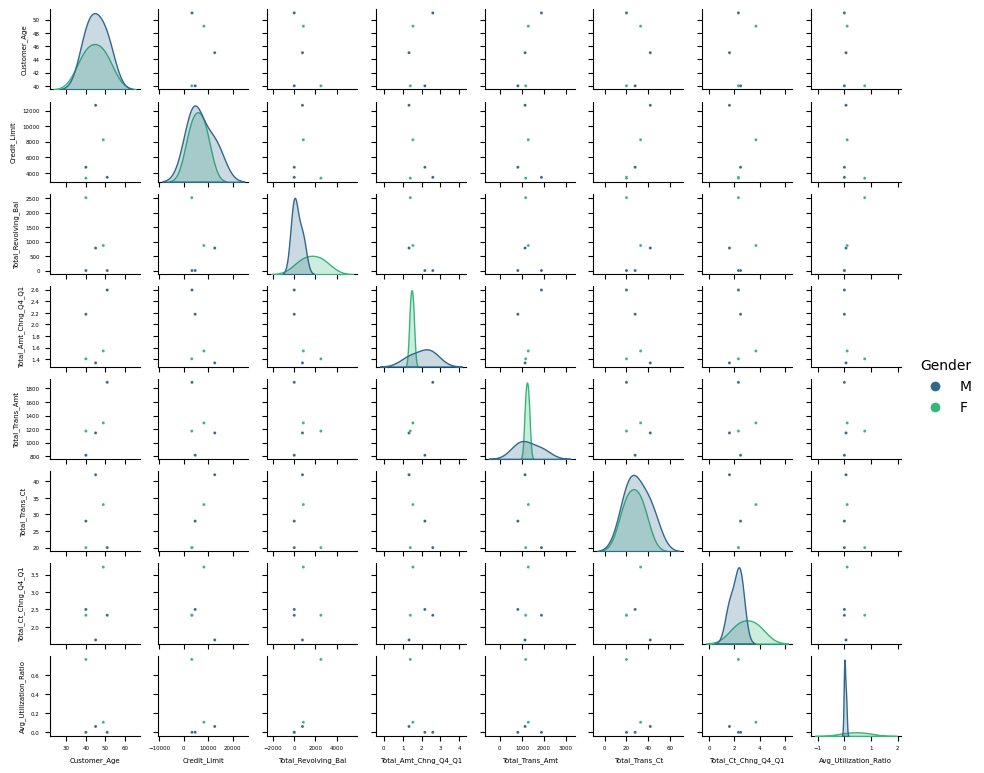

In [ ]:
plt.figure(figsize=(8, 8))
pairplot = sns.pairplot(df.head(), vars=columns, hue='Gender',
                        palette='viridis', plot_kws={'s': 5}, height=1, aspect=1.2)

for ax in pairplot.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=5)
    ax.set_ylabel(ax.get_ylabel(), fontsize=5)
    ax.tick_params(labelsize=4)
plt.show()